# E-commerce: Product Range Analysis

---
(This was the final project in the Data Analytics course by Practicum by Yandex.  Due to copyright, the raw dataset is unavailable for examination, but here is my analysis of the dataset we were provided)


## Project Goal:
Find ways to improve profits for the coming year by analyzing how the company did this year.

---

### Project Description



**PROBLEM:** How can we improve profits -- which means asking the questions:
* What are the best selling products?  Are they the most profitable because they sell the most, sell at the highest, or combination?
* Who are the top customers?  Do they make up a large percentage of total sales, or does the majority of sales come from many small purchases?

**SOLUTION:** 
* Analyze sales data to answer the questions posed.


Description of the data



* ```InvoiceNo``` — order identifier
* ```StockCode``` -- item identifier
* ```Description``` -- item name
* ```Quantity```
* ```InvoiceDate``` -- order date
* ```UnitPrice``` -- price per item
* ```CustomerID```




---

<a name = "toc"></a>
# Table of Contents

Opening Data
  
### Step 1: [Data Preprocessing](#preprocessing)
    * Rename variables to lower-cased with underscores between words
    * Feature engineering
    * Check for NULLS
    * Check for duplicates
    * Check for outliers
  
### Step 2: [Carry out EDA](#data_analysis)

### Step 3: [Testing hypothesis](#testing_hypothesis)

### Step 4: [Conclusion](#conclusion)


---

# Opening the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # Setting seaborn as default style even if use only matplotlib
sns.color_palette("tab10") # Set default color codes for seaborn

%matplotlib inline


In [2]:
# DISPLAY OPTIONS (uncomment and customize to activate)

# prevent annoying tendency of not displaying 'middle' columns if data is very wide
# change the max_columns value for even wider datasets

# pd.options.display.max_columns = None
# pd.options.display.max_columns = 40

# see "all" the rows if needed
# change max_rows to desired number

# pd.options.display.max_rows = 105

# pd.reset_option('^display.', silent=True)

### Custom Functions
I'ved coded up some functions that I seem to use regularly

In [3]:
# A helper function for my other functions
# returns the name of a DataFrame variable -- can be utilized in automation
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [17]:
# checks a single dataframe for duplicates, as well as show corresponding % of total
def show_info_on_duplicates(df):
    # Percentage of rows that are duplicates
    print("There are:\n" + str(df[df.duplicated()].shape[0])
          + " duplicate rows, making up\n"
          + (str(round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2))) 
          + "% of the total " 
          + str(df.shape[0]) 
          + " rows.")

In [18]:
def show_info_on_nulls(df):
    '''This function takes a dataframe and an optional column name and prints out the
    total number of rows that contain NaN's, either anywhere in the dataframe (by default),
    or in the specified column_name given as the second argument.  The function also
    will print out the percentage of the total dataframe that these found NaN's make up.
    
    PURPOSE: help the user decide whether or not s/he should consider dropping these particular rows
    
    REQUIREMENT: get_df_name()
    
    RETURNS: None.  Displays a printout.
    
    Version: 2020-09-28
    '''
    print("DataFrame: " + get_df_name(df))
    total_rows = df.shape[0]
    
    raw_data = {'Feature': df.columns}
    new_df = pd.DataFrame(raw_data, columns = ['Feature'])
    
    print("Observations (rows): " + str(total_rows))
    print()
    num_of_nans = []
    percent_of_total = []
    for each in df.columns:
        num_of_nans.append(df[df[each].isnull()].shape[0])
        percent_of_total.append(round(df[df[each].isnull()].shape[0] / df.shape[0] * 100, 2))
    new_df['NaNs'] = num_of_nans
    new_df['% total'] = percent_of_total
    print(new_df)
    print()

In [19]:
import re

def rename_variables(original_list):
    '''This function takes a list of an original CamelCase-name-styled variables -- the list can
    simply be the column names from df.columns -- and returns a list with all the variable names converted
    to lowercased versions, and with underscores between previously capitalized words.
    
    Librar(ies) required: re
    
    PURPOSE: make variable names for readable or 'Pythonic'
    
    RETURNS: a list of pythonically named variable names
    '''
    new_list = []
    
    for each_name in original_list:
    
        # Splitting on UpperCase using re - but not consecutive capital letters like 'ID' for example
        single_variables_names_list = re.findall(r'[A-Z](?:[A-Z]*(?![a-z])|[a-z]*)', each_name)

        lowercased_string_list = [each_string.lower() for each_string in single_variables_names_list]
        
        # if original list doesn't have any capital letters, we'd have an empty list -- let's check
        if not lowercased_string_list:
            return original_list
        else:

            # Recombine using underscores
            new_list.append('_'.join(lowercased_string_list))
    
    return new_list

### Read in the data

In [7]:
# Set the correct path -- uncomment the one you want to use

# Practicum path - uncomment the following line for reviewer to use on Practicum platform
# path = "/datasets/"

# local path - uncomment the following line to use inside project file
path = 'datasets/'

In [8]:
df = pd.read_csv(path + 'ecommerce_dataset_us.csv', sep = '\t')

---

### Check the basics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [12]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/07/2019 12:50,4.95,12680.0


In [16]:
df.sample(50)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
508804,579273,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,30,11/27/2019 10:00,2.55,15197.0
524381,580550,21705,BAG 500g SWIRLY MARBLES,24,12/03/2019 10:00,0.39,13126.0
499459,578675,23220,REINDEER HEART DECORATION GOLD,12,11/22/2019 18:13,0.83,14756.0
493753,578250,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,11/21/2019 12:43,1.25,15901.0
158125,550277,22960,JAM MAKING SET WITH JARS,6,04/13/2019 12:48,4.25,12639.0
45350,540255,22242,5 HOOK HANGER MAGIC TOADSTOOL,1,01/03/2019 16:50,3.36,NaN
68706,541871,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,1,01/22/2019 09:41,1.63,NaN
481398,577358,22594,CHRISTMAS GINGHAM TREE,3,11/16/2019 15:59,1.63,NaN
30846,538881,21257,VICTORIAN SEWING BOX MEDIUM,3,12/12/2018 15:54,16.13,NaN
296039,562846,22068,BLACK PIRATE TREASURE CHEST,1,08/08/2019 09:29,4.13,NaN


### Observations
* This is our largest dataset in our practicum.  
* Column names are camelCased -- we'll convert to snake_case 
* We have negative quantities as well as negative price, some very extreme. so we need to find explanations for them as well.
* We appear to be missing a LOT of CustomerID's
* InvoiceNo is currently a string type, but perhaps can be an int type.
* InvoiceDate is currently of type string, but should be datetime.
* CustomerID is of type float, but should be an int.
---

<a name = "preprocessing"></a>
# Data Preprocessing
  * Rename variables to lower-cased with underscores between words
  * Feature engineering
  * Check for NULLS
  * Check for duplicates
  * Check for outliers

### Rename variables
We'll use my custom function to change the variables from camelCased to lowercased with underscores

In [13]:
df.columns = rename_variables(df.columns)

In [14]:
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

### Observation
* We renamed the CamelCasedVariables into lower_cased_with_underscore_variable_names to make them more Pythonic and consistent with how I normally (so far) have worked with them
---

### Feature Engineering
We will add a total_price column, as we're going to look at sales totals by item/customer/date

In [35]:
df['total_price'] = df['quantity'] * df['unit_price']

In [36]:
df['total_price'].sum()

9726006.953999998

---

### Check for nulls

In [37]:
# check if any null values exist
df.isnull().values.any()

True

In [38]:
show_info_on_nulls(df)

DataFrame: df
Observations (rows): 536641

        Feature  NaNs  % total
0    invoice_no     0     0.00
1    stock_code     0     0.00
2   description  1454     0.27
3      quantity     0     0.00
4  invoice_date     0     0.00
5    unit_price     0     0.00
6   customer_id     0     0.00
7   total_price     0     0.00



### Observation
* 1454 rows are missing descriptions. However, they make up less 0.3% of the data, we can safely drop them.
* 135037 rows with emtpy customer_id -- we'll have to take a closer look as they comprise more than 25% of the data.
---

### Find and delete duplicate rows

In [39]:
show_info_on_duplicates(df)

There are:
0 duplicate rows, making up
0.0% of the total 536641 rows.


In [40]:
df = df.drop_duplicates()

### Observation
Nearly 1% of the data are duplicates?

**ACTION REQUIRED:** ask Data Engineering why there are so many duplicates.  Is there some UX bug where a user inadvertantly places an order more than once? Or some other issue?

---

### Null customers
Let's take a closer look as they comprise more than 25% of the data

In [26]:
# Let's take a look at the extremes of the quantity feature with customer_id as null
df[df['customer_id'].isnull()].sort_values(by = 'quantity', ascending = False).head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
74614,542504,37413,NaN,5568,01/26/2019 12:03,0.00,NaN,0.0
220843,556231,85123A,?,4000,06/07/2019 15:04,0.00,NaN,0.0
263885,560040,23343,came coded as 20713,3100,07/12/2019 14:28,0.00,NaN,0.0
115807,546139,84988,?,3000,03/07/2019 16:35,0.00,NaN,0.0
74615,542505,79063D,NaN,2560,01/26/2019 12:04,0.00,NaN,0.0
447035,574941,22197,POPCORN HOLDER,1820,11/05/2019 17:42,1.95,NaN,3549.0
160541,550460,47556B,did a credit and did not tick ret,1300,04/16/2019 13:18,0.00,NaN,0.0
203751,554550,47566B,incorrectly credited C550456 see 47,1300,05/23/2019 09:57,0.00,NaN,0.0
82795,543258,84611B,NaN,1287,02/02/2019 16:06,0.00,NaN,0.0
467796,576365,22197,POPCORN HOLDER,1130,11/12/2019 17:55,1.95,NaN,2203.5


In [27]:
df[df['customer_id'].isnull()].sort_values(by = 'quantity', ascending = False).tail(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
375429,569466,23270,incorrect stock entry.,-2880,10/02/2019 11:42,0.0,NaN,-0.0
113580,545990,84598,check,-3000,03/06/2019 13:07,0.0,NaN,-0.0
263884,560039,20713,wrongly marked. 23343 in box,-3100,07/12/2019 14:27,0.0,NaN,-0.0
323458,565304,16259,NaN,-3167,08/31/2019 12:18,0.0,NaN,-0.0
341601,566768,16045,NaN,-3667,09/12/2019 17:53,0.0,NaN,-0.0
431381,573596,79323W,"Unsaleable, destroyed.",-4830,10/29/2019 15:17,0.0,NaN,-0.0
115818,546152,72140F,throw away,-5368,03/07/2019 17:25,0.0,NaN,-0.0
225528,556687,23003,Printing smudges/thrown away,-9058,06/12/2019 10:36,0.0,NaN,-0.0
225529,556690,23005,printing smudges/thrown away,-9600,06/12/2019 10:37,0.0,NaN,-0.0
225530,556691,23005,printing smudges/thrown away,-9600,06/12/2019 10:37,0.0,NaN,-0.0


In [28]:
df[df['customer_id'].isnull()].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
449699,575138,22624,IVORY KITCHEN SCALES,1,11/06/2019 15:24,16.63,NaN,16.63
137472,548162,22083,PAPER CHAIN KIT RETROSPOT,1,03/27/2019 13:42,6.63,NaN,6.63
54921,540977,85169B,BLACK LOVE BIRD CANDLE,5,01/10/2019 15:01,0.85,NaN,4.25
431253,573585,84859A,SILVER DISCO HANDBAG,1,10/29/2019 14:41,4.13,NaN,4.13
272619,560772,16237,SLEEPING CAT ERASERS,4,07/18/2019 16:12,0.42,NaN,1.68
206853,554958,22207,FRYING PAN UNION FLAG,1,05/25/2019 15:17,8.29,NaN,8.29
62325,541497,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,3,01/16/2019 15:19,4.96,NaN,14.88
278270,561209,22950,36 DOILIES VINTAGE CHRISTMAS,1,07/23/2019 16:57,2.92,NaN,2.92
208833,555149,21390,FILIGRIS HEART WITH BUTTERFLY,1,05/29/2019 15:49,2.46,NaN,2.46
52961,540821,84968A,SET OF 16 VINTAGE ROSE CUTLERY,4,01/09/2019 13:16,8.47,NaN,33.88


In [29]:
df[df['unit_price'] == 0].count()

invoice_no      2510
stock_code      2510
description     1056
quantity        2510
invoice_date    2510
unit_price      2510
customer_id       40
total_price     2510
dtype: int64

### Observation
2510 records showing the unit_price of $0.  Let's see how much of sales revenues that these unknown customers make up.

In [30]:
# select the null customers
df_null_customers = df[df['customer_id'].isnull()].reset_index()

In [31]:
df_null_customers.head()

,index,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
0,622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN,0.00
1,1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN,2.51
2,1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN,5.02
3,1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN,3.40
4,1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN,3.32


In [32]:
print("Transactions from non-ID'ed customers totaled: {:.2f}".format(df_null_customers['total_price'].sum()))
print("out of ALL customers transactions totalling: {:.2f}".format(df['total_price'].sum()))
print("which comes out to "
     + str(round(df_null_customers['total_price'].sum()
                / df['total_price'].sum()
                * 100, 2))
     + "% of revenues.")

Transactions from non-ID'ed customers totaled: 1447487.53
out of ALL customers transactions totalling: 9726006.95
which comes out to 14.88% of revenues.


### Observation
\\$1.4 million from unaccounted customers is quite significant.  They make up 25% of the transactions 15% of revenues.

We can assume that some were cash transactions, where we don't know who the customers are.

However, there are transactions involving hundreds, even thousands of units. Some of these large transactions have no associated revenue (e.g. $0 unit price). It appears that large negative quantities sometimes were returned damaged product. Some large "sales" may have been gifts or donations.

**ACTION REQUIRED:** There has to be a better way to reconcile these abnormal transactions so that we can properly track and attribute them to either a profit or loss. In our case, we're talking $1.4 million in sales that cannot be properly accounted.

---

### Delete Null Customers?
Since we're talking about $1.4 million in transactions, we really cannot delete this information.

However, if we do any type of analysis regarding the customers, we would have to take this lack of ID into account.

We will fill the nulls with zeroes.

In [41]:
# Do not delete null customers
# df = df[df['customer_id'].notna()]

In [42]:
df['customer_id'].fillna(0, inplace=True)

---

# Comment
i am not sure you really need to drop the data. You drop 25% of data but you has no need in information about user id for some calculation. E.g. if you want to calculate mean cost of item, mean check, number of unique inovoices etc you don't need id of user.

You can continue without dropping data and use you knowledge about Null-values in user_id column only when it is really important.

### Changing Data Types
* We'll change all the invoice date to datetime
* We'll change customer ID to int
* We will change the text in description to lowercase

In [43]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [44]:
df['invoice_date'].min()

Timestamp('2018-11-29 08:26:00')

In [45]:
df['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

In [46]:
df['customer_id'] = df['customer_id'].astype(int)

In [47]:
df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
416341,572552,22897,OVEN MITT APPLES DESIGN,1,2019-10-22 17:07:00,3.29,14096,3.29
51034,540635,22678,FRENCH BLUE METAL DOOR SIGN 3,10,2019-01-08 12:03:00,1.25,14229,12.50
168827,551142,84279P,CHERRY BLOSSOM DECORATIVE FLASK,2,2019-04-24 13:22:00,3.75,17613,7.50
247403,558769,22995,TRAVEL CARD WALLET SUKI,24,2019-07-01 14:58:00,0.42,17899,10.08
45828,540288,20752,BLUE POLKADOT WASHING UP GLOVES,1,2019-01-04 12:45:00,2.10,17634,2.10


---

### Outliers - Negative quantities
Let's check why there are negative quantities

In [48]:
df[df['quantity'] < 0].sort_values(by = 'quantity').head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446,-168469.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346,-77183.6
225530,556691,23005,printing smudges/thrown away,-9600,2019-06-12 10:37:00,0.00,0,-0.0
225529,556690,23005,printing smudges/thrown away,-9600,2019-06-12 10:37:00,0.00,0,-0.0
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2018-11-30 14:23:00,0.03,15838,-280.8
225528,556687,23003,Printing smudges/thrown away,-9058,2019-06-12 10:36:00,0.00,0,-0.0
115818,546152,72140F,throw away,-5368,2019-03-07 17:25:00,0.00,0,-0.0
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2019-10-29 15:17:00,0.00,0,-0.0
341601,566768,16045,NaN,-3667,2019-09-12 17:53:00,0.00,0,-0.0
323458,565304,16259,NaN,-3167,2019-08-31 12:18:00,0.00,0,-0.0


### Observation
Two items have huge negative quantities.  Are the returns?  Combined, they make up over $200k in refunds.  Let's look at the first entry, stock# 23843 returned by customer# 16446

In [49]:
df[df['stock_code'] == '23843']

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:15:00,2.08,16446,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2019-12-07 09:27:00,2.08,16446,-168469.6


In [50]:
df[df['stock_code'] == '23166'].head(30)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346,-77183.60
186770,552882,23166,MEDIUM CERAMIC TOP STORAGE JAR,96,2019-05-10 10:10:00,1.04,14646,99.84
187196,552953,23166,MEDIUM CERAMIC TOP STORAGE JAR,4,2019-05-10 12:11:00,1.25,16745,5.00
187718,553005,23166,MEDIUM CERAMIC TOP STORAGE JAR,5,2019-05-10 16:29:00,1.25,14651,6.25
187868,553009,23166,MEDIUM CERAMIC TOP STORAGE JAR,3,2019-05-10 16:52:00,1.25,13601,3.75
188644,553052,23166,MEDIUM CERAMIC TOP STORAGE JAR,48,2019-05-11 10:14:00,1.04,15251,49.92
189398,553149,23166,MEDIUM CERAMIC TOP STORAGE JAR,12,2019-05-11 14:16:00,1.25,14226,15.00
189452,553152,23166,MEDIUM CERAMIC TOP STORAGE JAR,12,2019-05-11 14:55:00,1.25,13089,15.00
189591,553160,23166,MEDIUM CERAMIC TOP STORAGE JAR,12,2019-05-11 15:26:00,1.25,14194,15.00


### Observation
Okay, so they ARE refunds.  With those quanties, most likely they were erroneous entries that were corrected, as the transactions were also withing 15-20 minutes apart.

We'll delete them as they cancelled out. That way, we can avoid skewing any visualizations we make.

### Delete non-significant outliers

### Who are the returns?

In [51]:
df[df['invoice_no'].str.contains(pat = 'C[0-9]', regex = True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9251 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    9251 non-null   object        
 1   stock_code    9251 non-null   object        
 2   description   9251 non-null   object        
 3   quantity      9251 non-null   int64         
 4   invoice_date  9251 non-null   datetime64[ns]
 5   unit_price    9251 non-null   float64       
 6   customer_id   9251 non-null   int64         
 7   total_price   9251 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 650.5+ KB


### It looks like we have 9251 returns -- a return has invoice number prefix letter 'C'

In [52]:
rows_to_delete = [540421, 540422, 61619, 61624]

In [53]:
df.drop(rows_to_delete, axis = 'index', inplace = True)

# Comment
Fine! 

May be we can make it more precise and more "automatic". You need to find for all rows with negative number of items rows with same invoice without letter "C". And after that delete both rows (cancelation and purchase)

---

In [54]:
df[df['unit_price'] <= 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,0,0.0
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,0,0.0
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,0,0.0
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,0,0.0
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,0,0.0
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,0,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2019-12-06 13:58:00,0.0,0,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2019-12-06 13:58:00,0.0,0,0.0
538554,581408,85175,NaN,20,2019-12-06 14:06:00,0.0,0,0.0


In [55]:
df.sort_values(by = 'unit_price', ascending = False).head(30)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
222681,C556445,M,Manual,-1,2019-06-08 15:31:00,38970.00,15098,-38970.00
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2019-12-03 11:36:00,17836.46,0,-17836.46
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:55:00,16888.02,0,-16888.02
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:57:00,16453.71,0,-16453.71
15017,537632,AMAZONFEE,AMAZON FEE,1,2018-12-05 15:08:00,13541.33,0,13541.33
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:04:00,13541.33,0,-13541.33
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:49:00,13541.33,0,-13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:34:00,13474.79,0,-13474.79
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2019-12-03 11:35:00,11586.50,0,-11586.50
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,0,11062.06


### A quantity of 1 with a unit price of \$38970?
Let's take a closer look at this customer

In [56]:
df[df['customer_id'] == 15098]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2019-06-08 15:22:00,4.95,15098,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.50,15098,38970.0
222681,C556445,M,Manual,-1,2019-06-08 15:31:00,38970.00,15098,-38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.50,15098,649.5
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,2019-06-08 15:39:00,4.95,15098,-297.0


### Observation
Another case of weird shenanigans.  We can see that for this customer, a grand total of $649.50 was eventually netted after all the various purchase/refund transactions.  Perhaps someone was new and didn't know how to operate the cash register?

If this was online, then perhaps a customer service representative manually cancelled a mistakenly placed order.

**ACTION REQUIRED:** What happened here bears investigation.  Check with Product Manager, Customer Support, and back-end team to see if this process needs improvement

Due to the fact that the sales total here was almost $40k, we're going to delete the transactions that cancel each other out in this instance.


### Delete non-significant transactions

In [57]:
rows_to_delete = [222670,
                 222680,
                 222681,
                 222692]

In [58]:
df.drop(rows_to_delete, axis = 'index', inplace = True)

---

### Zero priced items
It doesn't make sense to analyze products with no price.  Question: were these items given away?

In [59]:
df[df['unit_price'] == 0].sort_values('customer_id')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,0,0.0
282875,561663,22501,incorrectly put back into stock,-108,2019-07-26 16:40:00,0.0,0,-0.0
282882,561665,22171,?,142,2019-07-26 16:55:00,0.0,0,0.0
282883,561666,22502,NaN,30,2019-07-26 16:59:00,0.0,0,0.0
282904,561668,44091A,NaN,-2,2019-07-26 17:03:00,0.0,0,-0.0
...,...,...,...,...,...,...,...,...
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2018-12-14 14:36:00,0.0,16560,0.0
279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,2019-07-24 12:24:00,0.0,16818,0.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2019-02-08 13:08:00,0.0,17560,0.0
187613,553000,47566,PARTY BUNTING,4,2019-05-10 15:21:00,0.0,17667,0.0


### Observation
Were these items given for free, perhaps as a promotion?  How come several customers received more than one type of item?

We will delete these, but this certainly brings up questions that should be answered.

In [60]:
df = df[df['unit_price'] != 0]

---

## Data Preprocessing Conclusion
* This is our largest dataset in our practicum.  
* We converted the original camelCased variables to lowercase with underscores
* We converted description text to lowercase for consistency, to allow for efficient deletions
* We investigated the large negative quantities and determined no-harm, no-foul for the largest outliers
* We were missing a LOT of CustomerID's -- were these just cash transactions, or was there something more?
* We converted invoice_no from type string to type int
* We converted invoice_date from type string to type datetime
* We converted customer_id from type float to type int

---

<a name = "data_analysis"></a>

# Carry out EDA
* Explore distributions and find out
    * What items sell the most?
    * Which items are returned the most?
    * How are buyers distributed?  Do sales come from few buyers who make huge purchases, or a large number of buyers making small purchases?
    * Explore seasonality -- which items sell best at what times?


### Group by Item stock code

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534123 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    534123 non-null  object        
 1   stock_code    534123 non-null  object        
 2   description   534123 non-null  object        
 3   quantity      534123 non-null  int64         
 4   invoice_date  534123 non-null  datetime64[ns]
 5   unit_price    534123 non-null  float64       
 6   customer_id   534123 non-null  int64         
 7   total_price   534123 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 36.7+ MB


In [62]:
aggregations = {
    'quantity': ('quantity','sum'),
    'num_of_customers': ('customer_id','nunique'),
    'sales_total': ('total_price','sum'),
    'sales_average': ('total_price', 'mean')
}

grouped_items = df.groupby(['stock_code',
                            'description',
                            'unit_price']).agg(**aggregations).reset_index()

In [63]:
grouped_items.head(50)

,stock_code,description,unit_price,quantity,num_of_customers,sales_total,sales_average
0,10002,INFLATABLE POLITICAL GLOBE,0.85,824,41,700.40,14.008000
1,10002,INFLATABLE POLITICAL GLOBE,1.63,9,1,14.67,2.095714
2,10002,INFLATABLE POLITICAL GLOBE,1.66,27,1,44.82,3.201429
3,10080,GROOVY CACTUS INFLATABLE,0.39,301,19,117.39,5.590000
4,10080,GROOVY CACTUS INFLATABLE,0.85,2,1,1.70,1.700000
5,10120,DOGGY RUBBER,0.21,192,25,40.32,1.390345
6,10123C,HEARTS WRAPPING TAPE,0.65,5,3,3.25,1.083333
7,10124A,SPOTS ON RED BOOKCOVER TAPE,0.42,16,5,6.72,1.344000
8,10124G,ARMY CAMO BOOKCOVER TAPE,0.42,17,4,7.14,1.785000
9,10125,MINI FUNKY DESIGN TAPES,0.42,260,10,109.20,10.920000


###### Observation
There are some identically described items, but whose unit_price differs.  Perhaps one is a discounted/bulk pricing?  However, it seems that pricing is/can be arbitrarily set?  Notice that item 10135 has pricing/quantity ratios that don't follow any rhyme or reason:
* Quantity 8688 @ \\$0.72 each
* Quantity 4200 @ \\$0.65 each
* Quantity 600 @ \\$0.53 each

In [64]:
grouped_items.describe()

,unit_price,quantity,num_of_customers,sales_total,sales_average
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,39.108888,325.336466,17.669246,597.383880,39.559728
std,414.488956,1009.532305,49.223973,1911.086232,428.464352
min,-11062.060000,-9360.000000,1.000000,-22124.120000,-17836.460000
25%,1.450000,6.000000,1.000000,25.500000,4.960000
50%,2.950000,34.000000,1.000000,115.460000,10.170000
75%,5.950000,192.000000,6.000000,435.000000,25.270909
max,17836.460000,27636.000000,814.000000,85738.500000,11062.060000


In [65]:
grouped_items_by_description = grouped_stock = df.groupby(['stock_code','description']).agg(**aggregations).reset_index()

In [66]:
grouped_items_by_description.describe()

,quantity,num_of_customers,sales_total,sales_average
count,4176.000000,4176.000000,4176.000000,4176.000000
mean,1268.391523,65.313458,2329.024654,13.507847
std,2885.717156,88.364388,7666.730254,129.155911
min,-1194.000000,1.000000,-221520.500000,-6515.308824
25%,45.000000,7.000000,106.192500,6.069004
50%,310.000000,31.000000,601.125000,10.732028
75%,1271.000000,88.000000,2055.182500,17.334659
max,53751.000000,888.000000,206245.480000,3022.500000


In [67]:
grouped_items_by_description.head(20)

,stock_code,description,quantity,num_of_customers,sales_total,sales_average
0,10002,INFLATABLE POLITICAL GLOBE,860,41,759.89,10.702676
1,10080,GROOVY CACTUS INFLATABLE,303,20,119.09,5.413182
2,10120,DOGGY RUBBER,192,25,40.32,1.390345
3,10123C,HEARTS WRAPPING TAPE,5,3,3.25,1.083333
4,10124A,SPOTS ON RED BOOKCOVER TAPE,16,5,6.72,1.344000
5,10124G,ARMY CAMO BOOKCOVER TAPE,17,4,7.14,1.785000
6,10125,MINI FUNKY DESIGN TAPES,1295,50,993.99,10.688065
7,10133,COLOURING PENCILS BROWN TUBE,2846,102,1535.40,7.793909
8,10135,COLOURING PENCILS BROWN TUBE,2228,93,2203.64,12.380000
9,11001,ASSTD DESIGN RACING CAR PEN,1430,46,2152.39,17.936583


### Observation
If we omit unit pricing, we can see that there is a total of 4176 different items carried.

---

In [68]:
aggregations = {
    'quantity': ('quantity','sum'),
    'num_of_customers': ('customer_id','nunique'),
    'sales_total': ('total_price','sum'),
    'sales_average': ('total_price', 'mean')
}

In [69]:
aggregations

{'quantity': ('quantity', 'sum'),
 'num_of_customers': ('customer_id', 'nunique'),
 'sales_total': ('total_price', 'sum'),
 'sales_average': ('total_price', 'mean')}

In [70]:
grouped_items_by_total_sales = df.groupby(['stock_code', 'description']).agg(
    **aggregations).sort_values(
    by = 'sales_total', 
    ascending = False).reset_index()

In [71]:
grouped_items_by_quantity_sold = df.groupby(['stock_code', 'description']).agg(
    **aggregations).sort_values(
    by = 'quantity', 
    ascending = False).reset_index()

In [72]:
grouped_items_by_unit_price = df.groupby(['stock_code', 'description', 'unit_price']).agg(
    **aggregations).sort_values(
    by = 'unit_price', 
    ascending = False).reset_index()

In [73]:
grouped_items_by_total_sales.head(20)

,stock_code,description,quantity,num_of_customers,sales_total,sales_average
0,DOT,DOTCOM POSTAGE,705,2,206245.48,291.719208
1,22423,REGENCY CAKESTAND 3 TIER,12996,888,164459.49,75.198669
2,47566,PARTY BUNTING,18006,709,98243.88,57.151763
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35002,859,97659.94,42.720884
4,85099B,JUMBO BAG RED RETROSPOT,47256,637,92175.79,42.812722
5,23084,RABBIT NIGHT LIGHT,30631,451,66661.63,64.594603
6,POST,POSTAGE,3003,380,66230.64,52.899872
7,22086,PAPER CHAIN KIT 50'S CHRISTMAS,18876,616,63715.24,53.362848
8,84879,ASSORTED COLOUR BIRD ORNAMENT,36282,680,58792.42,39.511035
9,79321,CHILLI LIGHTS,10222,206,53746.66,79.861308


In [74]:
grouped_items_by_quantity_sold.head(20)

,stock_code,description,quantity,num_of_customers,sales_total,sales_average
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751,308,13560.09,25.064861
1,85099B,JUMBO BAG RED RETROSPOT,47256,637,92175.79,42.812722
2,22197,POPCORN HOLDER,36322,297,33959.26,39.441649
3,84879,ASSORTED COLOUR BIRD ORNAMENT,36282,680,58792.42,39.511035
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36016,637,21047.07,15.396540
5,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35002,859,97659.94,42.720884
6,23084,RABBIT NIGHT LIGHT,30631,451,66661.63,64.594603
7,22492,MINI PAINT SET VINTAGE,26437,214,16810.42,43.103641
8,22616,PACK OF 12 LONDON TISSUES,26095,196,7967.82,15.176800
9,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24719,412,12170.77,13.736761


In [75]:
grouped_items_by_unit_price.head(30)

,stock_code,description,unit_price,quantity,num_of_customers,sales_total,sales_average
0,AMAZONFEE,AMAZON FEE,17836.46,-1,1,-17836.46,-17836.460000
1,AMAZONFEE,AMAZON FEE,16888.02,-1,1,-16888.02,-16888.020000
2,AMAZONFEE,AMAZON FEE,16453.71,-1,1,-16453.71,-16453.710000
3,AMAZONFEE,AMAZON FEE,13541.33,-1,1,-13541.33,-4513.776667
4,AMAZONFEE,AMAZON FEE,13474.79,-1,1,-13474.79,-13474.790000
5,AMAZONFEE,AMAZON FEE,11586.50,-1,1,-11586.50,-11586.500000
6,B,Adjust bad debt,11062.06,1,1,11062.06,11062.060000
7,AMAZONFEE,AMAZON FEE,8286.22,-1,1,-8286.22,-8286.220000
8,POST,POSTAGE,8142.75,0,1,0.00,0.000000
9,AMAZONFEE,AMAZON FEE,7427.97,-1,1,-7427.97,-7427.970000


In [76]:
grouped_items_by_unit_price[grouped_items_by_unit_price['sales_total'] < 0].sample(50)

,stock_code,description,unit_price,quantity,num_of_customers,sales_total,sales_average
15365,21412,VINTAGE GOLD TINSEL REEL,0.42,-6,1,-2.52,-2.520
16130,D,Discount,0.20,-48,1,-9.60,-9.600
14878,21285,RETROSPOT CANDLE MEDIUM,0.65,-24,1,-15.60,-15.600
812,BANK CHARGES,Bank Charges,109.84,-1,1,-109.84,-109.840
15108,22940,FELTCRAFT CHRISTMAS FAIRY,0.50,-12,1,-6.00,-6.000
327,M,Manual,276.08,-1,1,-276.08,-276.080
5402,21042,RED RETROSPOT APRON,4.65,-1,1,-4.65,-4.650
8468,21890,S/6 WOODEN SKITTLES IN COTTON BAG,2.75,-1,1,-2.75,-2.750
120,M,Manual,856.48,-1,1,-856.48,-856.480
533,M,Manual,189.44,-1,1,-189.44,-189.440


### Observation

It looks like we are being charged an Amazon fee (maybe we're selling on Amazon?) as well we are charging customers a shipping fee.

There are a lot of "manually" made entries that do not indicate at all what item was returned.  There are also a lot of discounts as well.

And, what is a "CRUK" commission, a payout to a third party, perhaps?





We can see there's an error with index 0 in the above group -- item 22502 is a Wicker Picknet Basket, with a unit price of \\$649.50.  However, the description says there are 60 pieces.  

I think it might be safe to assume that this is not a designer picnic basket that costs \\$649.50.  Therefore, someone entered the total sales price into the unit price, and used 1 in quantity.  The correct entry should be 60 quantity, and a unit price of \\$10.82

### Separate out the fees paid and charged
That way, we can more accurately gauge sales in terms of net profits

In [77]:
df_amazon_fees = df[df['stock_code'] == 'AMAZONFEE']

In [78]:
df_shipping_charges = df[df['stock_code'] == 'DOT']

In [105]:
df_postage_charges = df[df['stock_code'] == 'POST']
df_samples = df[df['stock_code'] == 'S']
df_bad_debt = df[df['stock_code'] == 'B']

In [94]:
df_bank_charges = df[df['stock_code'] == 'BANK CHARGES']

In [97]:
df = df[~df['stock_code'].str.contains('AMAZONFEE')]
df = df[~df['stock_code'].str.contains('DOT')]
df = df[~df['stock_code'].str.contains('POST')]
df = df[~df['stock_code'].str.contains('CRUK')]
df = df[~df['stock_code'].str.contains('BANK CHARGES')]

In [114]:
df = df[df['stock_code'] != 'M']
df = df[df['stock_code'] != 'D']
df = df[df['stock_code'] != 'B']
df = df[df['stock_code'] != 'S']

In [82]:
df[df['stock_code'] == '22502'].sort_values(by = 'unit_price', ascending = False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2019-06-08 15:33:00,649.50,15098,649.50
170645,551339,22502,PICNIC BASKET WICKER SMALL,1,2019-04-25 17:18:00,10.79,0,10.79
224313,556515,22502,PICNIC BASKET WICKER SMALL,1,2019-06-11 10:45:00,10.79,0,10.79
234244,557502,22502,PICNIC BASKET WICKER SMALL,2,2019-06-18 15:32:00,10.79,0,21.58
232567,557324,22502,PICNIC BASKET WICKER SMALL,2,2019-06-18 09:41:00,10.79,0,21.58
...,...,...,...,...,...,...,...,...
182710,552563,22502,PICNIC BASKET WICKER SMALL,16,2019-05-08 11:54:00,4.95,17597,79.20
182457,552547,22502,PICNIC BASKET WICKER SMALL,16,2019-05-08 10:34:00,4.95,13098,79.20
152290,549585,22502,PICNIC BASKET WICKER SMALL,32,2019-04-09 09:54:00,4.95,14616,158.40
181862,552514,22502,PICNIC BASKET WICKER SMALL,19,2019-05-07 16:30:00,4.95,0,94.05


### Correct entry# 222682

In [83]:
df.at[222682, 'description'] = 'picnic basket wicker small'

In [84]:
df.at[222682, 'quantity'] = 60

In [85]:
df.at[222682, 'unit_price'] = 10.83

### Recalculate groups

In [86]:
aggregations

{'quantity': ('quantity', 'sum'),
 'num_of_customers': ('customer_id', 'nunique'),
 'sales_total': ('total_price', 'sum'),
 'sales_average': ('total_price', 'mean')}

In [107]:
grouped_items = df.groupby(['stock_code',
                            'description',
                            'unit_price']).agg(**aggregations).reset_index()

In [115]:
grouped_items_by_total_sales = df.groupby(['stock_code', 'description']).agg(
    **aggregations).sort_values(
    by = 'sales_total', 
    ascending = False).reset_index()

In [116]:
grouped_items_by_quantity_sold = df.groupby(['stock_code', 'description']).agg(
    **aggregations).sort_values(
    by = 'quantity', 
    ascending = False).reset_index()

In [117]:
grouped_items_by_unit_price = df.groupby(['stock_code', 'description', 'unit_price']).agg(
    **aggregations).sort_values(
    by = 'unit_price', 
    ascending = False).reset_index()

In [118]:
grouped_items_by_total_sales.head(10)

,stock_code,description,quantity,num_of_customers,sales_total,sales_average
0,22423,REGENCY CAKESTAND 3 TIER,12996,888,164459.49,75.198669
1,47566,PARTY BUNTING,18006,709,98243.88,57.151763
2,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35002,859,97659.94,42.720884
3,85099B,JUMBO BAG RED RETROSPOT,47256,637,92175.79,42.812722
4,23084,RABBIT NIGHT LIGHT,30631,451,66661.63,64.594603
5,22086,PAPER CHAIN KIT 50'S CHRISTMAS,18876,616,63715.24,53.362848
6,84879,ASSORTED COLOUR BIRD ORNAMENT,36282,680,58792.42,39.511035
7,79321,CHILLI LIGHTS,10222,206,53746.66,79.861308
8,23298,SPOTTY BUNTING,8210,572,42030.67,36.046887
9,22386,JUMBO BAG PINK POLKADOT,20992,373,41584.43,33.401149


In [119]:
grouped_items_by_quantity_sold.head(10)

,stock_code,description,quantity,num_of_customers,sales_total,sales_average
0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751,308,13560.09,25.064861
1,85099B,JUMBO BAG RED RETROSPOT,47256,637,92175.79,42.812722
2,22197,POPCORN HOLDER,36322,297,33959.26,39.441649
3,84879,ASSORTED COLOUR BIRD ORNAMENT,36282,680,58792.42,39.511035
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36016,637,21047.07,15.396540
5,85123A,WHITE HANGING HEART T-LIGHT HOLDER,35002,859,97659.94,42.720884
6,23084,RABBIT NIGHT LIGHT,30631,451,66661.63,64.594603
7,22492,MINI PAINT SET VINTAGE,26437,214,16810.42,43.103641
8,22616,PACK OF 12 LONDON TISSUES,26095,196,7967.82,15.176800
9,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24719,412,12170.77,13.736761


In [120]:
grouped_items_by_unit_price.head(10)

,stock_code,description,unit_price,quantity,num_of_customers,sales_total,sales_average
0,22656,VINTAGE BLUE KITCHEN CABINET,295.0,3,2,885.0,295.000000
1,22655,VINTAGE RED KITCHEN CABINET,295.0,3,5,885.0,126.428571
2,22655,VINTAGE RED KITCHEN CABINET,265.5,-1,1,-265.5,-265.500000
3,22826,LOVE SEAT ANTIQUE WHITE METAL,195.0,8,9,1560.0,130.000000
4,22826,LOVE SEAT ANTIQUE WHITE METAL,175.0,2,1,350.0,350.000000
5,22656,VINTAGE BLUE KITCHEN CABINET,175.0,-1,1,-175.0,-175.000000
6,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.0,15,17,2475.0,130.263158
7,22828,REGENCY MIRROR WITH SHUTTERS,165.0,4,4,660.0,165.000000
8,C2,CARRIAGE,150.0,1,1,150.0,150.000000
9,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,145.0,18,6,2610.0,290.000000


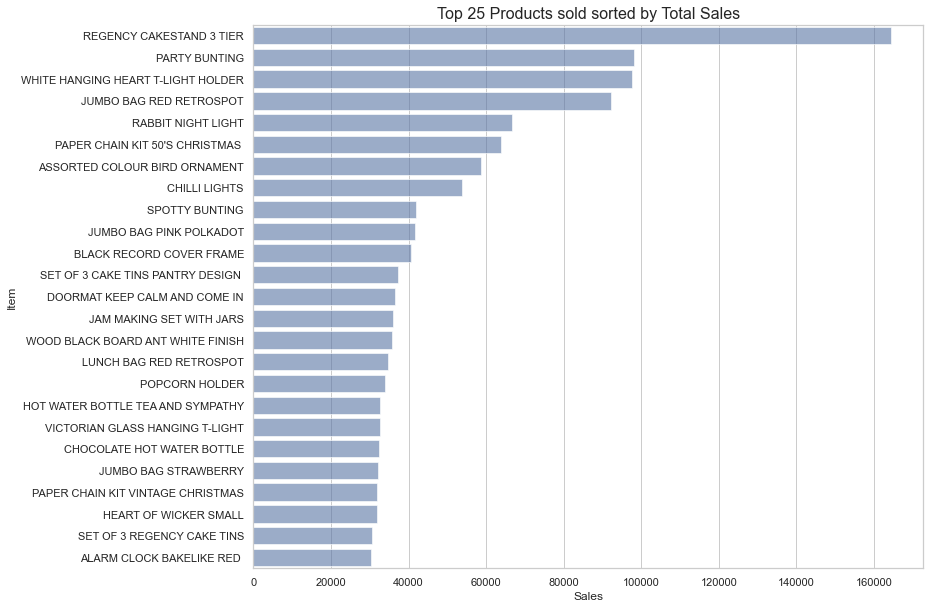

In [121]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (12, 10))


sns.barplot(
            x = 'sales_total',
            y = 'description',
            data = grouped_items_by_total_sales.head(25),
            color = 'b',
            alpha = 0.6).set_title("Top 25 Products sold sorted by Total Sales", fontsize = 16)

ax.set_xlabel('Sales')
ax.set_ylabel('Item');

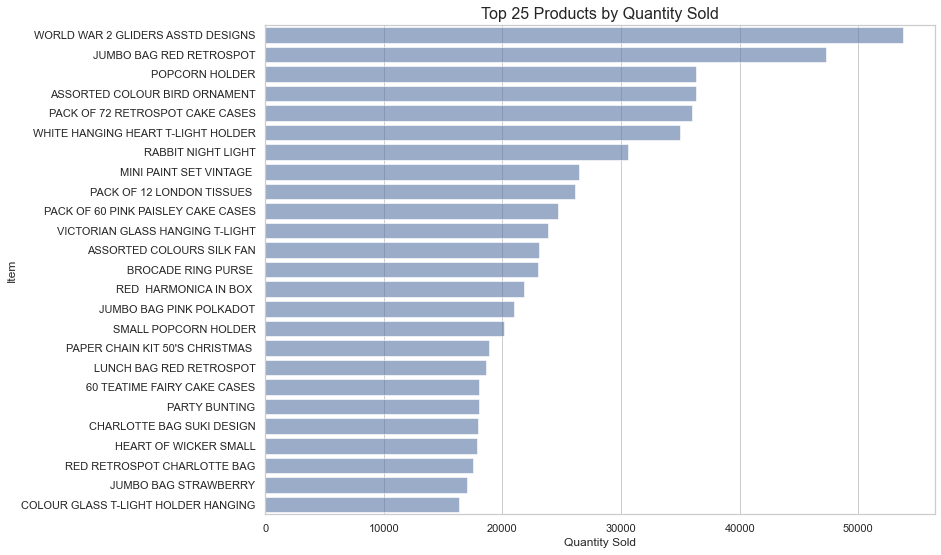

In [122]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (12, 9))


sns.barplot(
            x = 'quantity',
            y = 'description',
            data = grouped_items_by_quantity_sold.head(25),
            color = 'b',
            alpha = 0.6).set_title("Top 25 Products by Quantity Sold", fontsize = 16)

ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Item');

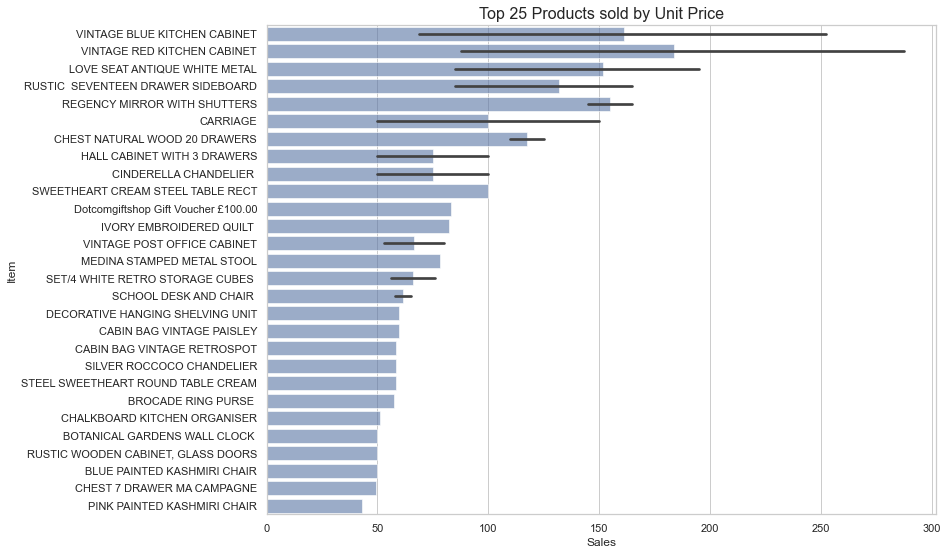

In [123]:
sns.set(style = 'whitegrid')
f, ax = plt.subplots(figsize = (12, 9))


sns.barplot(
            x = 'unit_price',
            y = 'description',
            data = grouped_items_by_unit_price.head(48),
            color = 'b',
            alpha = 0.6).set_title("Top 25 Products sold by Unit Price", fontsize = 16)

ax.set_xlabel('Sales')
ax.set_ylabel('Item');

### Observations
* Both the charts of top products sold by revenue generated and by quantities sold show a skewed chart.  A small number of products bring in high revenue, and then a much larger group bring in less.
* Likewise, a small number of products get purchased more, and a much larger group have less sales.

Like the "elbow method" in determining clusters, we can pick some numbers to see which group brought in more total profits.

### Find the "elbow"

In [124]:
product_sales_total = 20000

In [125]:
sales_above_20k = grouped_items[grouped_items['quantity'] >= product_sales_total]['sales_total'].sum()

In [126]:
sales_below_20k = grouped_items[grouped_items['quantity'] < product_sales_total]['sales_total'].sum()

In [127]:
print("Products bringing in sales of $" 
      + str(product_sales_total) 
      + " or above totaled: $" 
      + str(round(sales_above_20k, 2))
      + " or {:.2f}% of total sales.".format(
      sales_above_20k / grouped_items['sales_total'].sum() * 100))
print("Products that brought in under $"
      + str(product_sales_total) 
      + " totaled: $" 
      + str(round(sales_below_20k,2))
      + " or {:.2f}% of total sales.".format(
      sales_below_20k / grouped_items['sales_total'].sum() * 100))

Products bringing in sales of $20000 or above totaled: $66941.98 or 0.69% of total sales.
Products that brought in under $20000 totaled: $9670040.89 or 99.31% of total sales.


In [128]:
# we can do a more detailed breakdown.  First, a list of dollar amounts for possible "elbow" locations
product_sales_list = [20000, 10000, 7500, 5000, 4500, 4000, 3000, 2000, 1000]
product_quantities_list = [20000, 10000, 7500, 5000, 4000, 3000, 1500]
unit_price_list = [500, 250, 100, 50, 25, 10, 5, 3, 2, 1, 0.75, 0.5, 0.25]

In [129]:
def revenues_percentage_above_below_x_feature(grouped_df, feature_name, list_of_units):
    '''This function takes a grouped by item dataframe, and a list of feature quantities and compares sales
    between products selling more than a given feature quantity versus products selling less than the feature quantity.
    
    PURPOSE: give the analyst a better idea of whether more profits came from fewer high priced items, or 
    from a lot of lower priced items
    
    RETURNS: a DataFrame with the percentages broken down by list_of_units
    '''
    columns = [feature_name, 
               'sales_above', 
               'sales_below', 
               'percent_above', 
               'percent_below']
    new_df = pd.DataFrame(columns = columns)
    total_sales = grouped_df['sales_total'].sum()
    
    for units in list_of_units:
        sales_at_above_feature_units = grouped_df[grouped_df[feature_name] >= units]['sales_total'].sum()
        sales_below_feature_units = grouped_df[grouped_df[feature_name] < units]['sales_total'].sum()
        
        new_df = new_df.append({feature_name : units,
                                'sales_above' : round(sales_at_above_feature_units, 2),
                                'sales_below' : round(sales_below_feature_units,2),
                                'percent_above' : round(sales_at_above_feature_units / total_sales * 100, 2),
                                'percent_below' : round(sales_below_feature_units / total_sales * 100, 2) },
                                ignore_index = True)
    return new_df

In [136]:
df_revenue_percentages_above_below_sales_totals = revenues_percentage_above_below_x_feature(grouped_items, "sales_total", product_sales_list)

In [137]:
df_revenue_percentages_above_below_sales_totals

,sales_total,sales_above,sales_below,percent_above,percent_below
0,20000.0,537442.06,9199540.81,5.52,94.48
1,10000.0,1467462.59,8269520.28,15.07,84.93
2,7500.0,2068389.18,7668593.69,21.24,78.76
3,5000.0,3395942.69,6341040.18,34.88,65.12
4,4500.0,3712038.28,6024944.59,38.12,61.88
5,4000.0,4076211.92,5660770.95,41.86,58.14
6,3000.0,4972323.63,4764659.24,51.07,48.93
7,2000.0,6035255.75,3701727.12,61.98,38.02
8,1000.0,7520351.09,2216631.78,77.23,22.77


In [138]:
df_revenue_percentages_above_below_sales_totals.iloc[0][2]

9199540.81

In [133]:
import matplotlib.pyplot as plt

def show_pie(percentage_df, unit_name, title_name):
    # Pie chart
    labels = ['Equal to or above ' + str(percentage_df[0]) + ' ' + unit_name,
              '< ' + str(percentage_df[0]) + ' ' + unit_name]
    sizes = [percentage_df[1], percentage_df[2]]

    #colors
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

    # figure size
    plt.figure(figsize = (8,8))
    
    # font size
    plt.rcParams['font.size'] = 18
    
    plt.pie(sizes,
            colors = colors,
            labels = labels,
            autopct = '%1.1f%%',
            startangle = 90,
            pctdistance = 0.85)

    #draw circle
    centre_circle = plt.Circle((0,0),
                               0.6,
                               fc = 'white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(title_name, fontsize = 18)
    plt.tight_layout()
    plt.show()

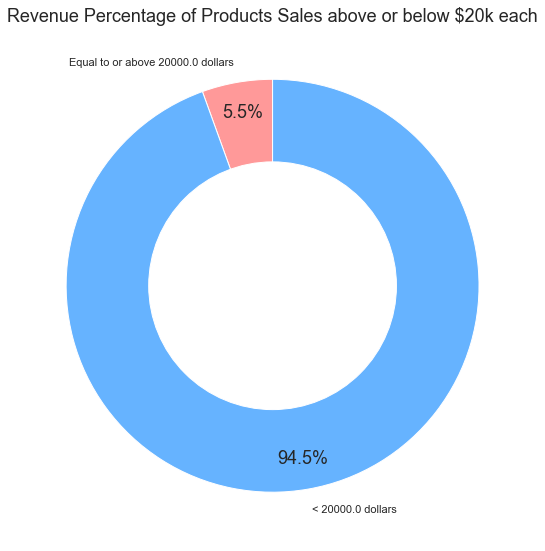

In [139]:
show_pie(df_revenue_percentages_above_below_sales_totals.iloc[0], 'dollars','Revenue Percentage of Products Sales above or below $20k each')

### Observation
We can see that the majority of sales are products that total less than \\$20,000 in sales.
Some of the extreme numbers we see make up just 5.5% of total sales.

In [140]:
df_revenue_percentages_above_below_quantities_sold = revenues_percentage_above_below_x_feature(grouped_items, "quantity", product_quantities_list)

In [141]:
df_revenue_percentages_above_below_quantities_sold

,quantity,sales_above,sales_below,percent_above,percent_below
0,20000.0,66941.98,9670040.89,0.69,99.31
1,10000.0,392919.72,9344063.15,4.04,95.96
2,7500.0,704203.02,9032779.85,7.23,92.77
3,5000.0,1372403.85,8364579.02,14.09,85.91
4,4000.0,1854922.01,7882060.86,19.05,80.95
5,3000.0,2480569.52,7256413.35,25.48,74.52
6,1500.0,4168348.60,5568634.27,42.81,57.19


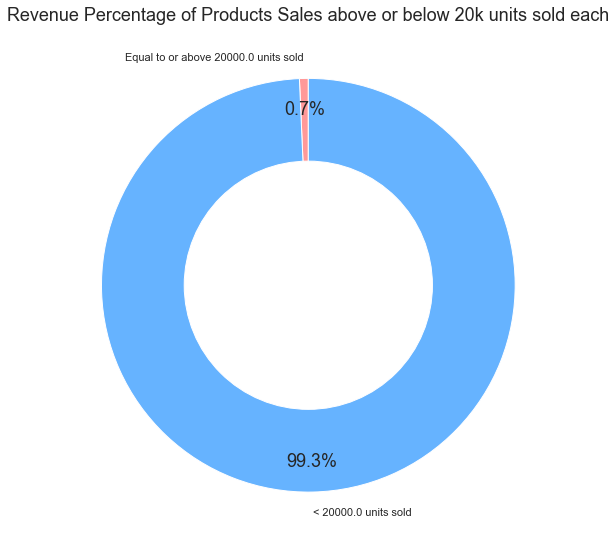

In [142]:
show_pie(df_revenue_percentages_above_below_quantities_sold.iloc[0], 'units sold', 'Revenue Percentage of Products Sales above or below 20k units sold each')

### Observation
Likewise, over 99% of total sales are from products selling less than 20,000 units.

In [143]:
df_revenue_percentages_above_below_unit_prices = revenues_percentage_above_below_x_feature(grouped_items, "unit_price", unit_price_list)

In [144]:
df_revenue_percentages_above_below_unit_prices

,unit_price,sales_above,sales_below,percent_above,percent_below
0,500.00,-570.00,9737552.87,-0.01,100.01
1,250.00,654.33,9736328.54,0.01,99.99
2,100.00,19008.13,9717974.74,0.20,99.80
3,50.00,34611.07,9702371.80,0.36,99.64
4,25.00,83889.28,9653093.59,0.86,99.14
5,10.00,794945.24,8942037.63,8.16,91.84
6,5.00,2256773.14,7480209.73,23.18,76.82
7,3.00,4302753.66,5434229.21,44.19,55.81
8,2.00,6100605.80,3636377.07,62.65,37.35
9,1.00,8656224.25,1080758.62,88.90,11.10


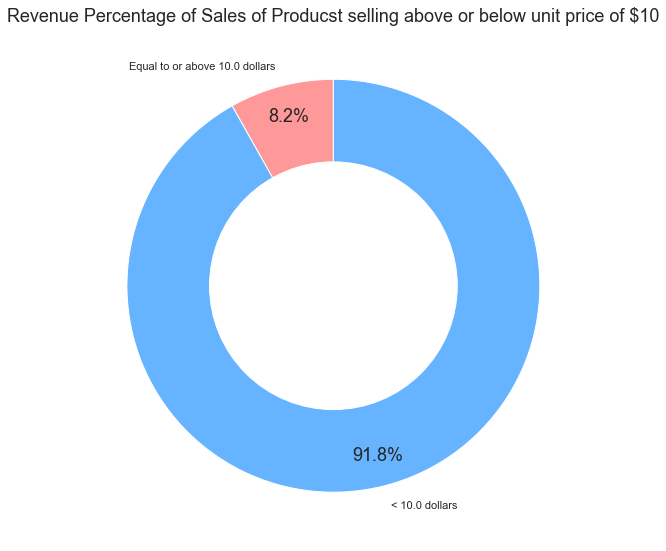

In [146]:
show_pie(df_revenue_percentages_above_below_unit_prices.iloc[5], 'dollars', 'Revenue Percentage of Sales of Producst selling above or below unit price of $10')

### Observation
This appears to be a "\\$10 Store", since the majority of sales comes from products selling for \\$10 or less.

More likely, though, this is a wholesaler, judging by the variety of prices and discounts, as well as some of the quantities sold.

In any case:
* We found that the top products sold by revenue generated and by quantities sold show skewed charts: 
    * Products that brought in sales of \\$20k only make up 5.5% of total revenues
    * More than 75% of revenues were from products that generated sales of \\$7500 or less each
* Likewise, nearly 80% of revenues were from products that sold 4000 or less units
* And finally, more than 80% of revenues came from products whose unit pricing was \\$5 or less



### Group by Customer

In [147]:
aggregations = {
    'orders': ('invoice_no', 'nunique'),
    'sales_total': ('total_price','sum'),
    'sales_average': ('total_price', 'mean')
}

grouped_customers = df.groupby(['customer_id']).agg(
    **aggregations).sort_values(
    by = 'sales_total', ascending = False).reset_index()

In [148]:
top_20_customers = grouped_customers.head(20).sort_values(by = 'sales_total', ascending = False)

In [149]:
top_20_customers

,customer_id,orders,sales_total,sales_average
0,0,1410,1506879.59,11.451323
1,14646,73,278778.02,135.197876
2,18102,60,259657.30,602.453132
3,17450,49,189575.53,559.219853
4,14911,243,132893.24,22.558690
5,12415,24,123638.18,159.739251
6,14156,65,114335.77,80.859809
7,17511,45,88138.20,82.065363
8,16684,30,65920.12,235.429000
9,13694,57,62961.54,108.367539


In [150]:
def plot_cust_sales_history(grouped_df, group_name = ""):
    num_of_customers = len(grouped_df)
    print("Sales history of the " + group_name + " customers")
    for i in range(0, num_of_customers):
        plt.figure(figsize = (15, 6))
        df[df['customer_id'] == grouped_df['customer_id'][i]]['total_price'].hist(bins = 100)
        plt.title('Customer:' + str(grouped_df['customer_id'][i]))
        plt.xlabel('Orders')
        plt.ylabel('Invoice totals')
        plt.show()

Sales history of the top 20 customers


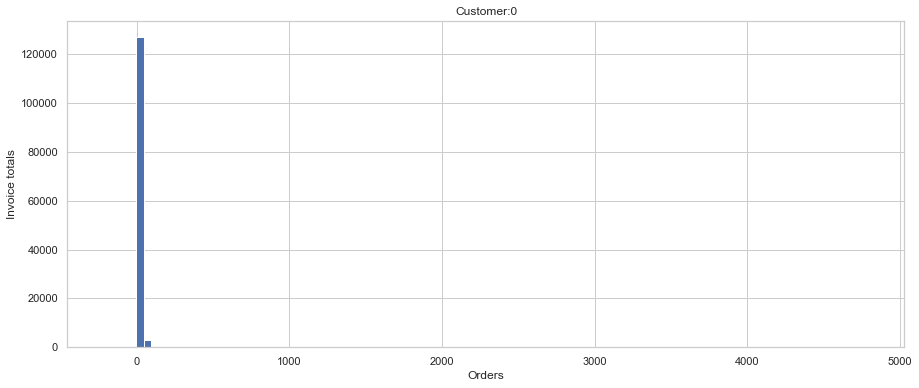

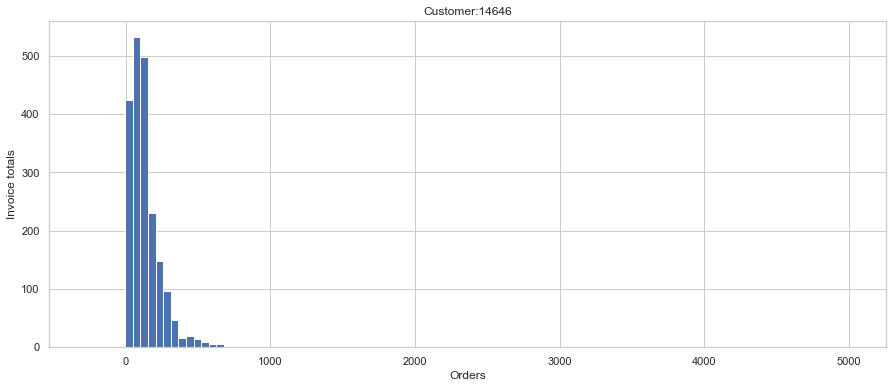

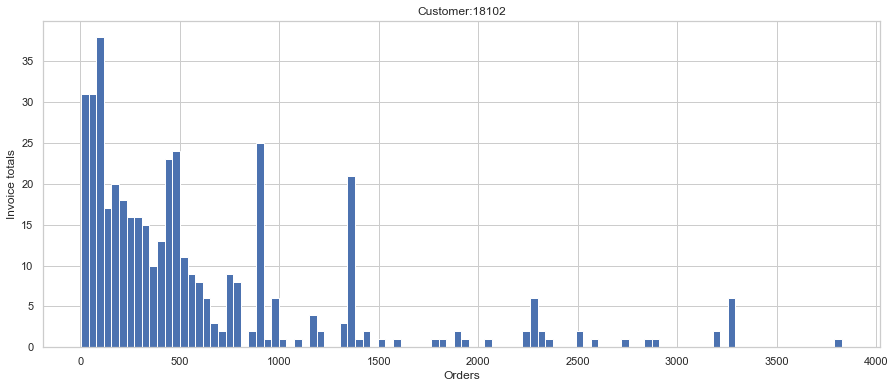

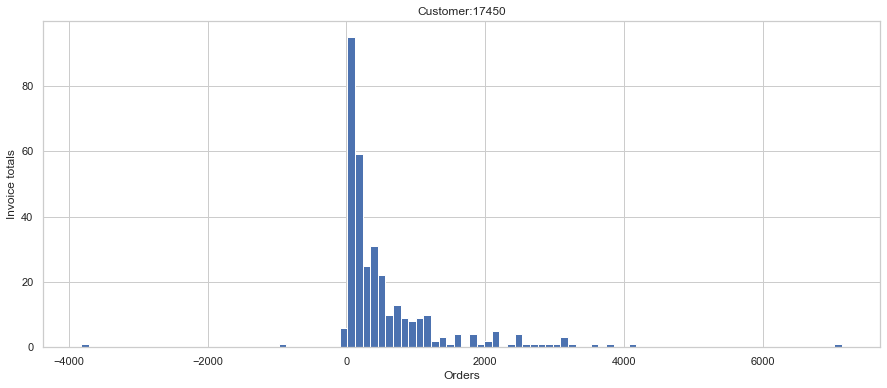

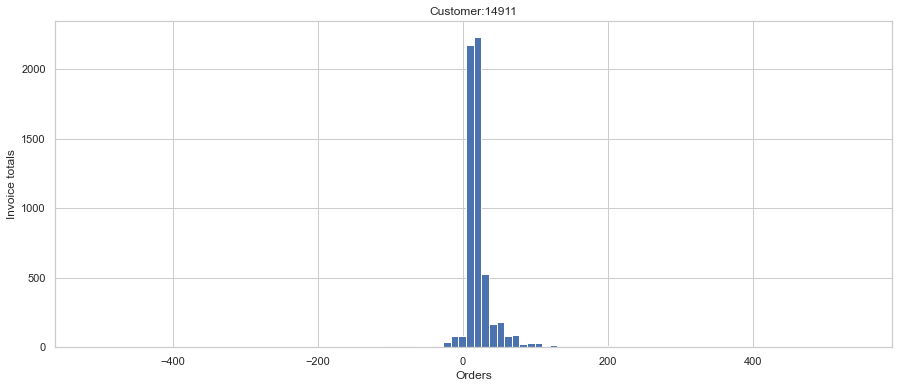

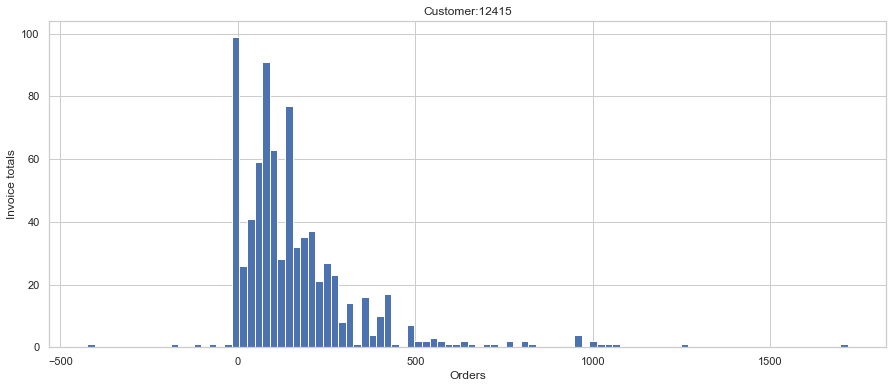

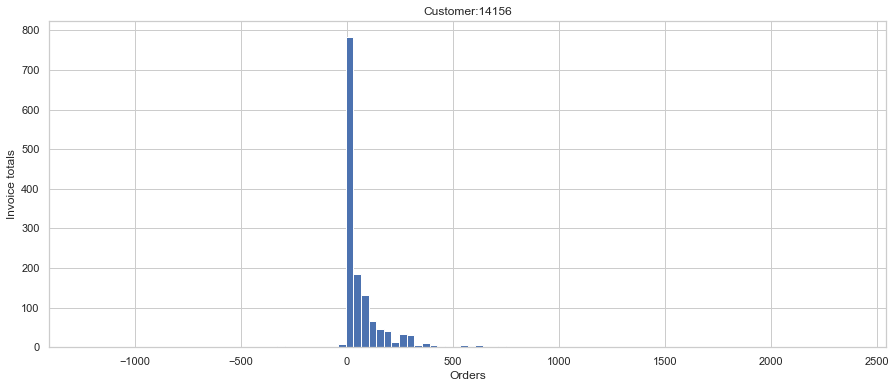

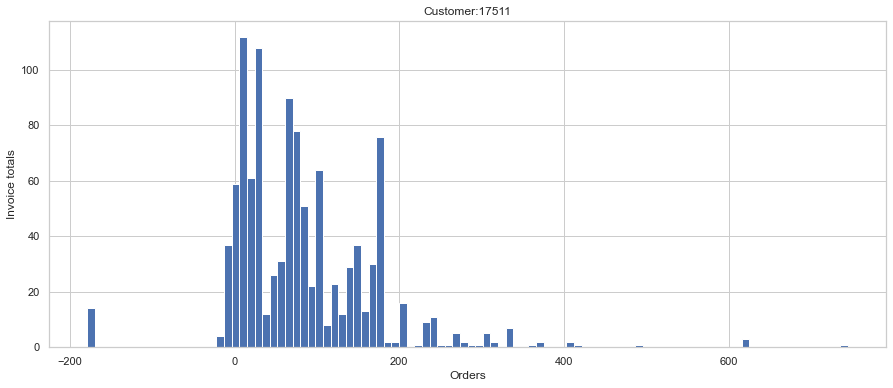

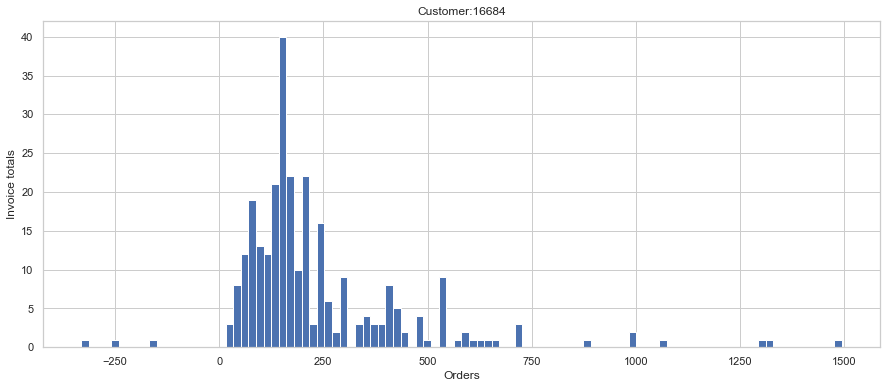

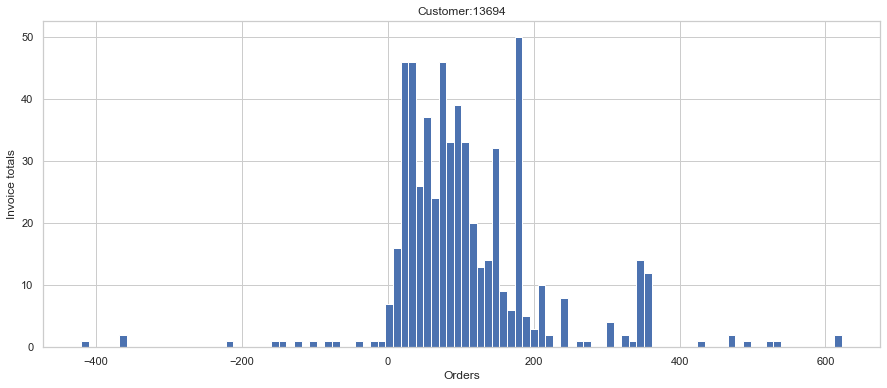

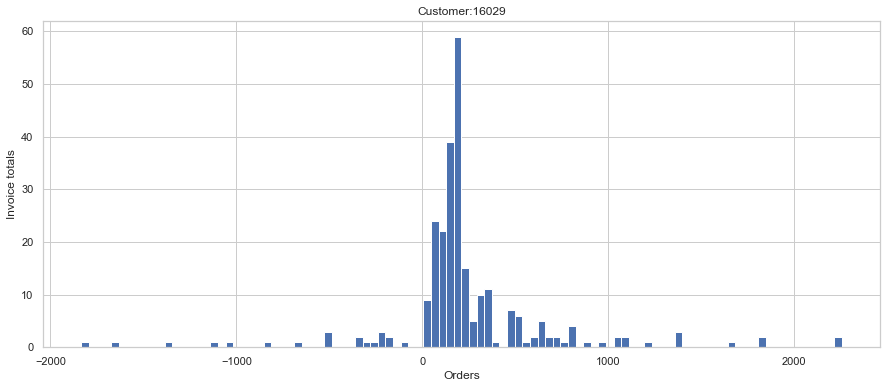

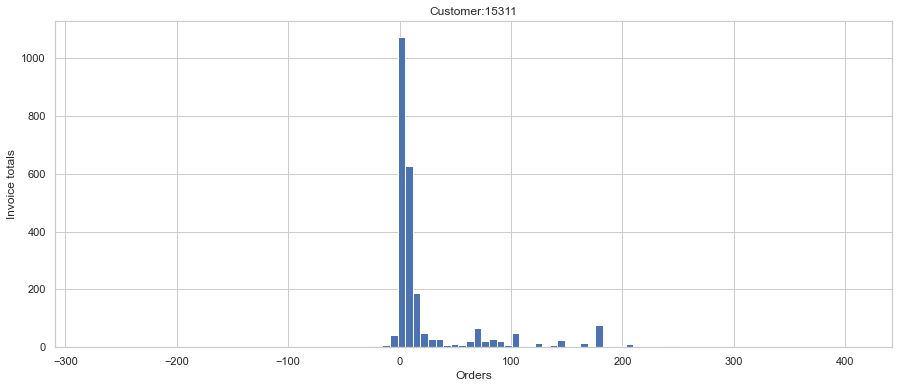

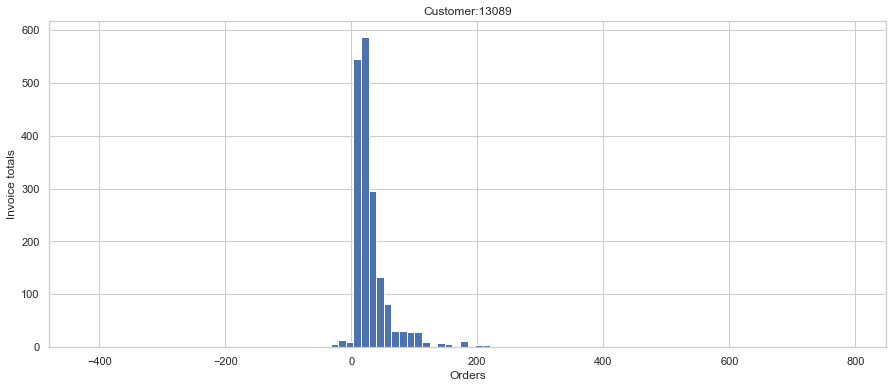

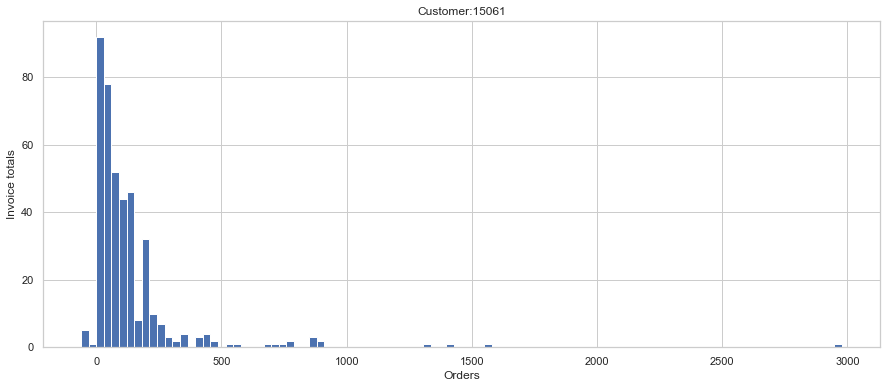

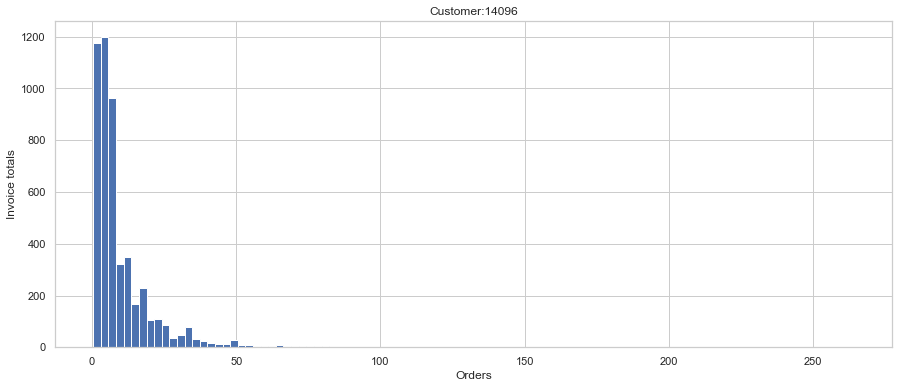

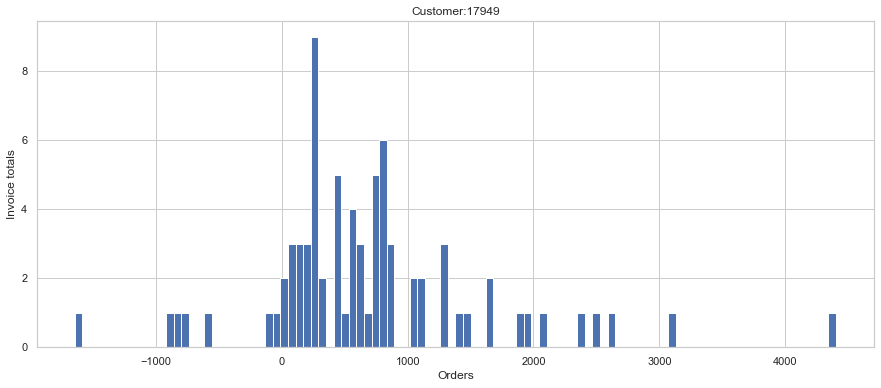

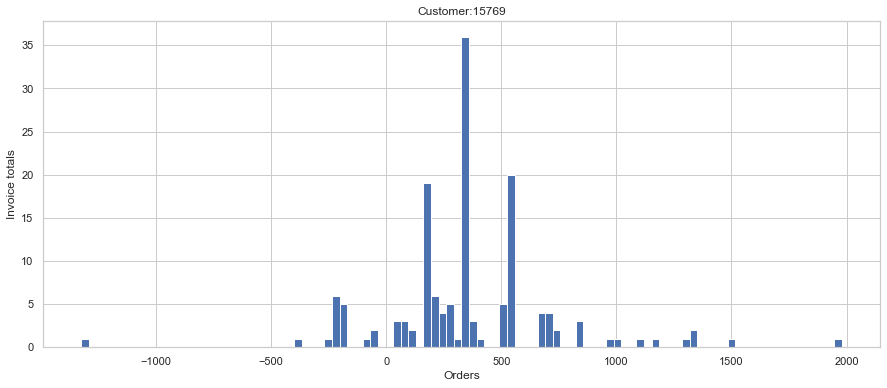

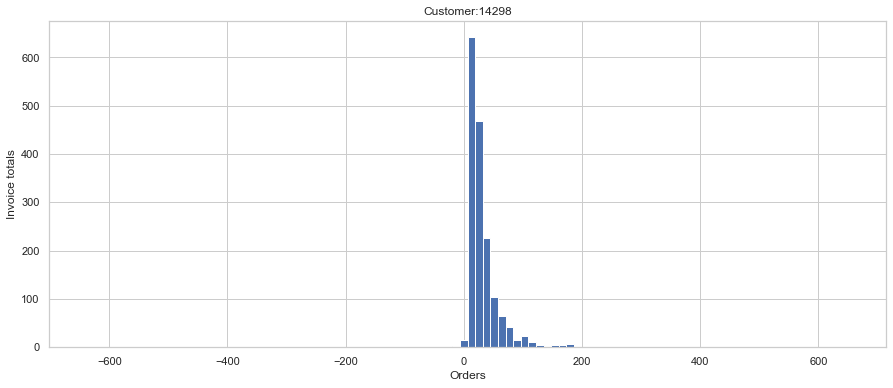

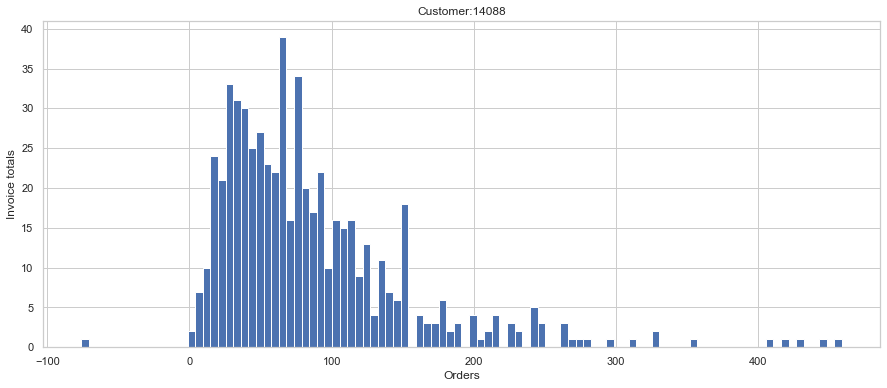

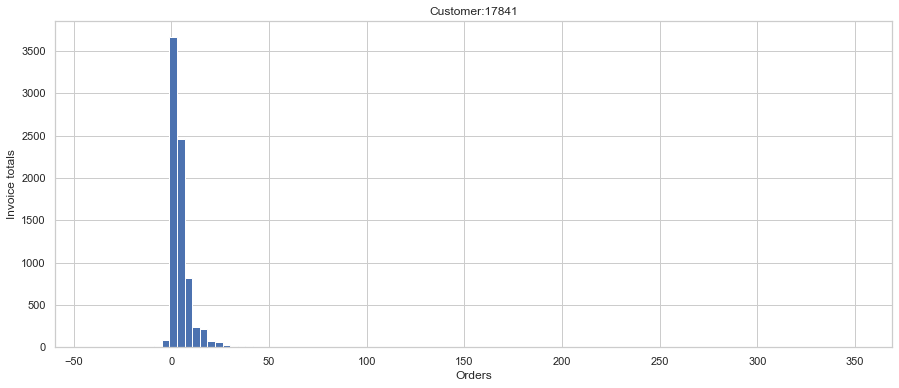

In [151]:
plot_cust_sales_history(top_20_customers, 'top 20')

In [152]:
top_20_customers.sort_values(by = 'orders', ascending = False)

,customer_id,orders,sales_total,sales_average
0,0,1410,1506879.59,11.451323
4,14911,243,132893.24,22.558690
19,17841,169,39861.49,5.110447
11,15311,118,59284.19,23.924209
12,13089,118,57322.13,30.934771
1,14646,73,278778.02,135.197876
10,16029,66,60369.93,232.192038
6,14156,65,114335.77,80.859809
2,18102,60,259657.30,602.453132
9,13694,57,62961.54,108.367539


### Observation
Of the Top 20 customers, 90% made for than 24 orders (we are disregarding customer_id of "zero", since these were the unknown customers).

### Cohort Analysis

In [153]:
first_order_date_by_customers = df.groupby('customer_id')['invoice_date'].min()

In [154]:
first_order_date_by_customers.name = 'first_order_date'

In [155]:
df = df.join(first_order_date_by_customers, on = 'customer_id')

In [156]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price,first_order_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29 08:26:00


In [157]:
df['first_order_month'] = df['first_order_date'].astype('datetime64[M]')

In [158]:
df['order_month'] = df['invoice_date'].astype('datetime64[M]')

In [159]:
df.sample(50)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,total_price,first_order_date,first_order_month,order_month
52733,540816,22988,SOLDIERS EGG CUP,12,2019-01-09 12:55:00,1.25,15518,15.00,2019-01-09 12:50:00,2019-01-01,2019-01-01
491913,578079,21452,TOADSTOOL MONEY BOX,6,2019-11-20 16:26:00,2.95,13985,17.70,2019-03-18 13:48:00,2019-03-01,2019-11-01
180113,552304,22884,NUMBER TILE VINTAGE FONT 5,3,2019-05-06 15:15:00,1.95,12748,5.85,2018-11-29 12:48:00,2018-11-01,2019-05-01
238865,557957,22925,BLUE GIANT GARDEN THERMOMETER,2,2019-06-21 19:20:00,5.95,13969,11.90,2018-12-07 19:32:00,2018-12-01,2019-06-01
373916,569367,23089,GLASS BON BON JAR,1,2019-10-01 15:28:00,1.95,13994,1.95,2019-07-12 18:28:00,2019-07-01,2019-10-01
95375,544455,22727,ALARM CLOCK BAKELIKE RED,1,2019-02-18 13:18:00,3.75,13097,3.75,2018-12-12 15:13:00,2018-12-01,2019-02-01
186843,552883,20726,LUNCH BAG WOODLAND,100,2019-05-10 10:13:00,1.45,14646,145.00,2018-12-18 10:09:00,2018-12-01,2019-05-01
456585,575698,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2019-11-08 16:51:00,0.55,16094,13.20,2019-01-04 17:36:00,2019-01-01,2019-11-01
56860,541120,22966,GINGERBREAD MAN COOKIE CUTTER,12,2019-01-12 09:13:00,1.25,12490,15.00,2019-01-12 09:13:00,2019-01-01,2019-01-01
208104,555095,23190,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,12,2019-05-29 13:32:00,1.65,12540,19.80,2018-12-11 09:39:00,2018-12-01,2019-05-01


In [160]:
aggregations = {
    'num_of_orders': ('invoice_no', 'nunique'),
    'num_of_customers' : ('customer_id', 'nunique'),
    'sales_total': ('total_price','sum')
}


cohort_grouped = df.groupby('first_order_month').agg(**aggregations)

In [161]:
cohort_grouped

,num_of_orders,num_of_customers,sales_total
first_order_month,,,
2018-11-01,4533,205,2.791599e+06
2018-12-01,7012,743,3.109304e+06
2019-01-01,2821,473,1.075818e+06
2019-02-01,1692,365,5.095876e+05
2019-03-01,1735,414,5.661178e+05
2019-04-01,989,285,2.895956e+05
2019-05-01,936,291,2.784896e+05
2019-06-01,703,225,2.063646e+05
2019-07-01,530,201,1.591624e+05


### Observation
We would expect that revenue from every cohort be lower than that of the previous one since customers from older cohorts would have had more time to place orders.  However, there was a huge (more than 2x) spike in the second cohort (December, 2018), which could possibly be attributed to the Christmas holiday.

Additionally, the March 2019 cohort was also (albeit slightly) higher than the February 2019 cohort, as well as May compared to April, September to August, and October to September.

December 2019 cohort was very small, due to the fact the data collected ends on 2019-12-07.

In [162]:
df['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

In [163]:
# Assess changes in absolute values by month

df.pivot_table(index = 'first_order_month',
              columns = 'order_month',
              values = 'customer_id',
              aggfunc = 'nunique')

order_month,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
first_order_month,,,,,,,,,,,,,,
2018-11-01,205.0,93.0,80.0,70.0,77.0,79.0,83.0,81.0,72.0,76.0,81.0,80.0,99.0,39.0
2018-12-01,NaN,743.0,295.0,236.0,289.0,250.0,298.0,264.0,263.0,261.0,280.0,296.0,387.0,161.0
2019-01-01,NaN,NaN,473.0,110.0,130.0,113.0,157.0,134.0,127.0,126.0,141.0,158.0,177.0,45.0
2019-02-01,NaN,NaN,NaN,365.0,90.0,66.0,103.0,99.0,86.0,85.0,100.0,99.0,110.0,24.0
2019-03-01,NaN,NaN,NaN,NaN,414.0,77.0,110.0,83.0,103.0,78.0,102.0,107.0,113.0,32.0
2019-04-01,NaN,NaN,NaN,NaN,NaN,285.0,65.0,61.0,62.0,58.0,66.0,66.0,78.0,17.0
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,291.0,67.0,49.0,49.0,62.0,72.0,84.0,15.0
2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,50.0,43.0,58.0,60.0,72.0,14.0
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.0,45.0,40.0,47.0,55.0,19.0


### Observations
* The number of active customers decreases after the first month
* It seems like the first 4-5 cohorts, after the initial month, settles into a somewhat consistent level of orders.  However, around mid-year, the average orders seem lower.  Perhaps this is due to seasonality.
* The users of the December 2018 cohort still account for the greatest share of active customers even a year later.


### Assess changes in relative values by lifetime

In [164]:

aggregations = {'revenue': ('total_price', 'sum'),
               'num_of_customers' : ('customer_id','nunique')}

orders_grouped_by_cohorts = df.groupby(['first_order_month',
                                       'order_month']).agg(**aggregations)

In [165]:
orders_grouped_by_cohorts.head(10)

revenue  num_of_customers
first_order_month order_month                             
2018-11-01        2018-11-01   103249.92               205
                  2018-12-01   288927.89                93
                  2019-01-01   201104.98                80
                  2019-02-01   122481.67                70
                  2019-03-01   188820.36                77
                  2019-04-01   110959.43                79
                  2019-05-01   181814.92                83
                  2019-06-01   159306.76                81
                  2019-07-01   198619.92                72
                  2019-08-01   185200.43                76

In [166]:
orders_grouped_by_cohorts['revenue_per_customer'] = orders_grouped_by_cohorts[
    'revenue'] / orders_grouped_by_cohorts['num_of_customers']

In [167]:
orders_grouped_by_cohorts.head()

revenue  num_of_customers  \
first_order_month order_month                                
2018-11-01        2018-11-01   103249.92               205   
                  2018-12-01   288927.89                93   
                  2019-01-01   201104.98                80   
                  2019-02-01   122481.67                70   
                  2019-03-01   188820.36                77   

                               revenue_per_customer  
first_order_month order_month                        
2018-11-01        2018-11-01             503.658146  
                  2018-12-01            3106.751505  
                  2019-01-01            2513.812250  
                  2019-02-01            1749.738143  
                  2019-03-01            2452.212468

### Revenue per customer for cohorts changing over time

In [168]:
orders_grouped_by_cohorts.pivot_table(index = 'first_order_month',
                                     columns = 'order_month',
                                     values = 'revenue_per_customer',
                                     aggfunc = 'mean')

order_month,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
first_order_month,,,,,,,,,,,,,,
2018-11-01,503.658146,3106.751505,2513.812250,1749.738143,2452.212468,1404.549747,2190.541205,1966.750123,2758.610000,2436.847763,2428.364198,2969.289125,4946.200505,3261.504359
2018-12-01,NaN,493.394118,691.084339,696.352712,723.754533,567.085600,841.306879,815.689356,803.970722,970.578123,1109.974214,1124.566791,914.069871,592.175280
2019-01-01,NaN,NaN,469.320825,514.782636,502.203846,419.405398,617.751720,585.060448,603.758898,684.126746,535.173830,746.551392,745.179718,465.561333
2019-02-01,NaN,NaN,NaN,413.594548,280.583778,460.032727,425.118544,322.990606,374.810000,453.589647,494.392500,468.381010,508.164182,197.993333
2019-03-01,NaN,NaN,NaN,NaN,416.745749,301.293117,523.536818,430.806145,480.659709,541.381282,532.999216,600.243271,523.734690,235.308125
2019-04-01,NaN,NaN,NaN,NaN,NaN,393.485758,380.790769,363.614590,331.168387,368.477759,392.663030,416.196667,400.702436,233.914118
2019-05-01,NaN,NaN,NaN,NaN,NaN,NaN,412.786632,268.635224,401.065714,346.586327,443.159839,472.353750,443.804524,331.350000
2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382.773289,285.003400,284.189070,475.182931,425.922500,506.441667,299.322857
2019-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440.266323,241.316444,406.657250,399.262766,364.312182,249.515789


### Finding cohort lifetime

In [169]:
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts[
    'order_month'] - orders_grouped_by_cohorts['first_order_month']

In [170]:
# convert lifetime to months
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')

In [171]:
# round to nearest month
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

In [172]:
# change first_order_month to year and month only
orders_grouped_by_cohorts['first_order_month'] = orders_grouped_by_cohorts['first_order_month'].dt.strftime('%Y-%m')

In [173]:
orders_grouped_by_cohorts

,first_order_month,order_month,revenue,num_of_customers,revenue_per_customer,cohort_lifetime
0,2018-11,2018-11-01,103249.92,205,503.658146,0
1,2018-11,2018-12-01,288927.89,93,3106.751505,1
2,2018-11,2019-01-01,201104.98,80,2513.812250,2
3,2018-11,2019-02-01,122481.67,70,1749.738143,3
4,2018-11,2019-03-01,188820.36,77,2452.212468,4
...,...,...,...,...,...,...
100,2019-10,2019-11-01,45989.21,104,442.203942,1
101,2019-10,2019-12-01,9953.31,37,269.008378,2
102,2019-11,2019-11-01,126523.24,302,418.951126,0
103,2019-11,2019-12-01,5384.70,23,234.117391,1


In [174]:
# pivot table of changes in average revenue per customer whose columns will contain the lifetime and whose rows will be cohorts
avg_revenue_per_customer_pivot = orders_grouped_by_cohorts.pivot_table(index = 'first_order_month',
                                                                  columns = 'cohort_lifetime',
                                                                  values = 'revenue_per_customer',
                                                                  aggfunc = 'mean')

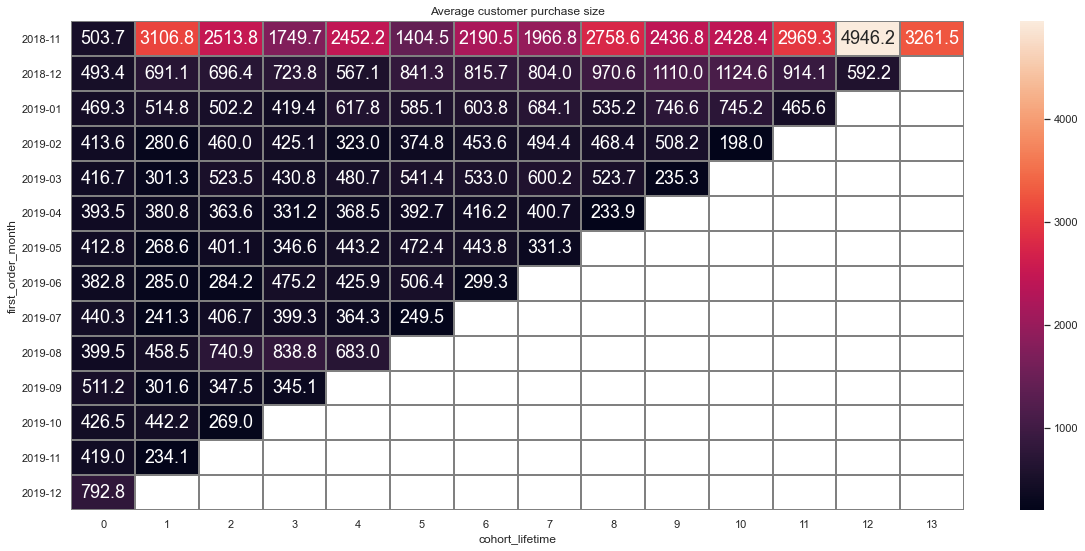

In [175]:
# let's visualize revenue_per_customer_pivot
plt.figure(figsize = (20, 9))
plt.title('Average customer purchase size')
sns.heatmap(avg_revenue_per_customer_pivot,
            annot = True, 
            fmt='.1f',
            linewidth = 1,
            linecolor = 'gray');

### Observation
* We can see that the Nov 2018 cohort looks like the "winner" in terms of higher sales throughout their lifetime
* The final cohort Dec 2019 has the highest initial purchases.  Perhaps the result of a good marketing campaign?

<a name = "testing_hypothesis"></a>
# Testing Hypothesis

After analyzing the data, the question comes to mind whether the average unit price paid by the top buyers was different than the rest.  Did the top buyers get discounted pricing, and "made up" for it with the sheer volume they ordered?

Null hypothesis: The average price paid by the Top 25% of customers is the same as the rest, suggesting that the only difference in top customers is the volume of items they purchase.

Alternative hypothesis: The average price by the Top 25% of customers is not the same as the rest, suggesting that they get special pricing discounts, but make up for it by the sheer volume they purchase.

In [176]:
# We will group the customers and then sort by total revenues

In [177]:
grouped_customer = df.groupby('customer_id').agg({'invoice_no':'nunique',
                                                  'unit_price': 'mean',
                                                  'total_price': 'sum'}).reset_index()

In [178]:
grouped_customer.head()

,customer_id,invoice_no,unit_price,total_price
0,0,1410,4.468638,1506879.59
1,12347,7,2.644011,4310.00
2,12348,4,0.692963,1437.24
3,12349,1,4.237500,1457.55
4,12350,1,1.581250,294.40


In [179]:
grouped_customer.describe()

,customer_id,invoice_no,unit_price,total_price
count,4362.00000,4362.000000,4362.000000,4.362000e+03
mean,15297.41105,5.316598,3.406677,2.232926e+03
std,1736.71147,23.134383,5.973947,2.423915e+04
min,0.00000,1.000000,0.122500,-1.192200e+03
25%,13814.25000,1.000000,2.171436,2.930250e+02
50%,15299.50000,3.000000,2.845251,6.432150e+02
75%,16777.75000,5.000000,3.740464,1.584745e+03
max,18287.00000,1410.000000,295.000000,1.506880e+06


In [180]:
# For the top 25%, they spent $1582.60 or more

In [181]:
grouped_customers_sorted_total_price = grouped_customer.sort_values(by = 'total_price', ascending = False)

In [190]:
top_25_percent = grouped_customers_sorted_total_price[
    grouped_customers_sorted_total_price['total_price'] >= grouped_customers_sorted_total_price['total_price'].quantile(0.75)]['unit_price']

In [191]:
other_75_percent = grouped_customers_sorted_total_price[
    grouped_customers_sorted_total_price['total_price'] < grouped_customers_sorted_total_price['total_price'].quantile(0.75)]['unit_price']

In [193]:
from scipy import stats as st


In [194]:
# significance level.  Not a life or death situation, so we choose 0.5
alpha = 0.05

In [ ]:
top_25 = top_25_percent.sample(200).to_list()
other_75 = other_75_percent.sample(200).to_list()

In [195]:
results = st.ttest_ind(top_25_percent, other_75_percent)

In [196]:
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the samples tested")
else:
    print("Failed to reject the null hypothesis: there is no reason to consider the samples different")
        

Rejecting the null hypothesis: there is a significant difference between the samples tested


# Comment
Two moments here:
1. Why do you sample the data? You can use the whole data and it help you to get more significant results of test. The more data test has the more confident it is. 
2. I recommed to print pvalue and may be plot the histogram to check yourself. If you will see similar histograms you can be calm, but if they are very different you will have a signal "There is something wrong in the code"

<a name = "conclusion"></a>
# Conclusion

### Dataset
* This was our largest dataset in our practicum.  
* Column names are camelbacked -- we converted to lowercase
* There were also negative quantities and prices, some very extreme. So we investigated them as well.
* We were missing a LOT of CustomerID's
* We converted data types - InvoiceNo into int type, InvoiceDate into datetime, CustomerID into int.

### Duplicates
* We deleted 5268 duplicate rows, which was 0.97% of the data

ACTION REQUIRED: Why was nearly 1% of the data duplicates?  Need to ask Data Engineering about data logging, or UX about data entry.  Is there a bug in the backend, or is this a front-end issue (or user error)?

### Missing Data (Nulls/Nans)

* 1454 rows are missing descriptions. There are some descriptions, "damaged, manual, postage, check, discount, samples, bank fee", etc., that we can exclude from our analysis. There were also things like, "oops ! adjustment, crushed ctn, etc. " In the end, however, they make up less 0.3% of the data, so we dropped them.
* 135037 rows with emtpy customer_id which comprises 25% of the transactions involved unknown customers. These transactions total \\$1.4 million, so a significant amount.
Some can perhaps be attributed to cash transactions, but the sheer number of their existence suggests a systemic problem that should be discussed with PdM, UX, Data/Engineering.

There were transactions involving hundreds, even thousands of units.  Some of these large transactions have no associated revenue (e.g. \\$0 unit price).  It appears that large negative quantities sometimes were returned damaged product.  Some large "sales" may have been gifts or donations.
In any case, since we cannot correlate these transactions with actual customers, we deleted these transactions as well.

ACTION REQUIRED: There has to be a better way to reconcile these abnormal transactions so that we can properly track and attribute them to either a profit or loss.  In our case, we're talking \\$1.4 million in sales that cannot be properly accounted.

### Outliers

* We deleted a couple of notable "erroneous" transactions -- two orders that had 80k+ and 74k+ units ordered, and then cancelled/returned within minutes.
* Another pair of transactions that started off with 60 units ordered @ $649.50, totally \\$38970, and then refunded 3 minutes later as a single item with a unit_price of \\$38970. This also presented an opportunity to correct another transaction's unit pricing.

ACTION REQUIRED: Some items are obvious returns, but others have no customers associated, and some descriptions look very arbitrary.  There should be a more consistent system, because some of the quantities and dollar amounts are very large (in the negative).

* There were also 37 transactions where zero dollars were charged -- I'm assuming the items in these transactions were given to the customer for free. We deleted these as well, since we would not be able to take action on any particular customer.

ACTION REQUIRED: Why were also several dozen items are listed with unit_price of \\$0?

* Of the top 20 customers, 90% made 24 or more orders.

### EDA

* Some transactions for the same item have different prices that seem to have been arbitrarily set, e.g. not related to units purchased.
* We found that the top products sold by revenue generated and by quantities sold show skewed charts: 
	* Products that brought in sales of \\$20k only make up 5.5% of total revenues
	* More than 75% of revenues were from products that generated sales of \\$7500 or less each
* Likewise, nearly 80% of revenues were from products that sold 4000 or less units
* And finally, more than 80% of revenues came from products whose unit pricing was \\$10 or less
* 90% of The Top 20 customers (in terms of sales) made 24 or more orders

### Cohort Analysis
* The number of active customers decreases after the first month
* It seems like the first 4-5 cohorts, after the initial month, settles into a somewhat consistent level of orders. However, around mid-year, the average orders seem lower. Perhaps this is due to seasonality.
* The users of the December 2018 cohort still account for the greatest share of active customers even a year later (It was also the largest cohort, nearly twice the size of the next two largest -- could be attributed to Christmas holiday, but again, consistently outpurchased the other cohorts in the dataset).
* In terms of revenue, the November 2018 cohort produced the most revenue consistently throughout the study.
* The December 2019 cohort (only one month) had the highest initial revenue, perhaps the result of a good holiday marketing campaign?


### Hypothesis Testing
* We hypothesized that the top 25% customers may be getting special pricing, such as discounts, and making up the difference by sheer volume.
**RESULT**: We reject the null hypothesis. The top 25% customers do appear to be getting a different pricing.

Although we've seen pricing that seems arbritrary, our testing do show that the top 25% of customers on average have different pricing.  Perhaps they were getting free samples, which might explain the \\$0 unit pricing on some items.  In addition to questions about the entire ordering system that we posed above, we should also ask about customer service/support -- they being the face or "voice" of the company, they can constitute a large part of whether there is repeat business by current customers.

In short, there appears to be many areas that can be shored up, in order to continuing generating more accurate and complete data that will help the business make more accurate assessments and decisions.

[back to top](#toc)